In [1]:
import matplotlib.pyplot as plt
import numpy as np

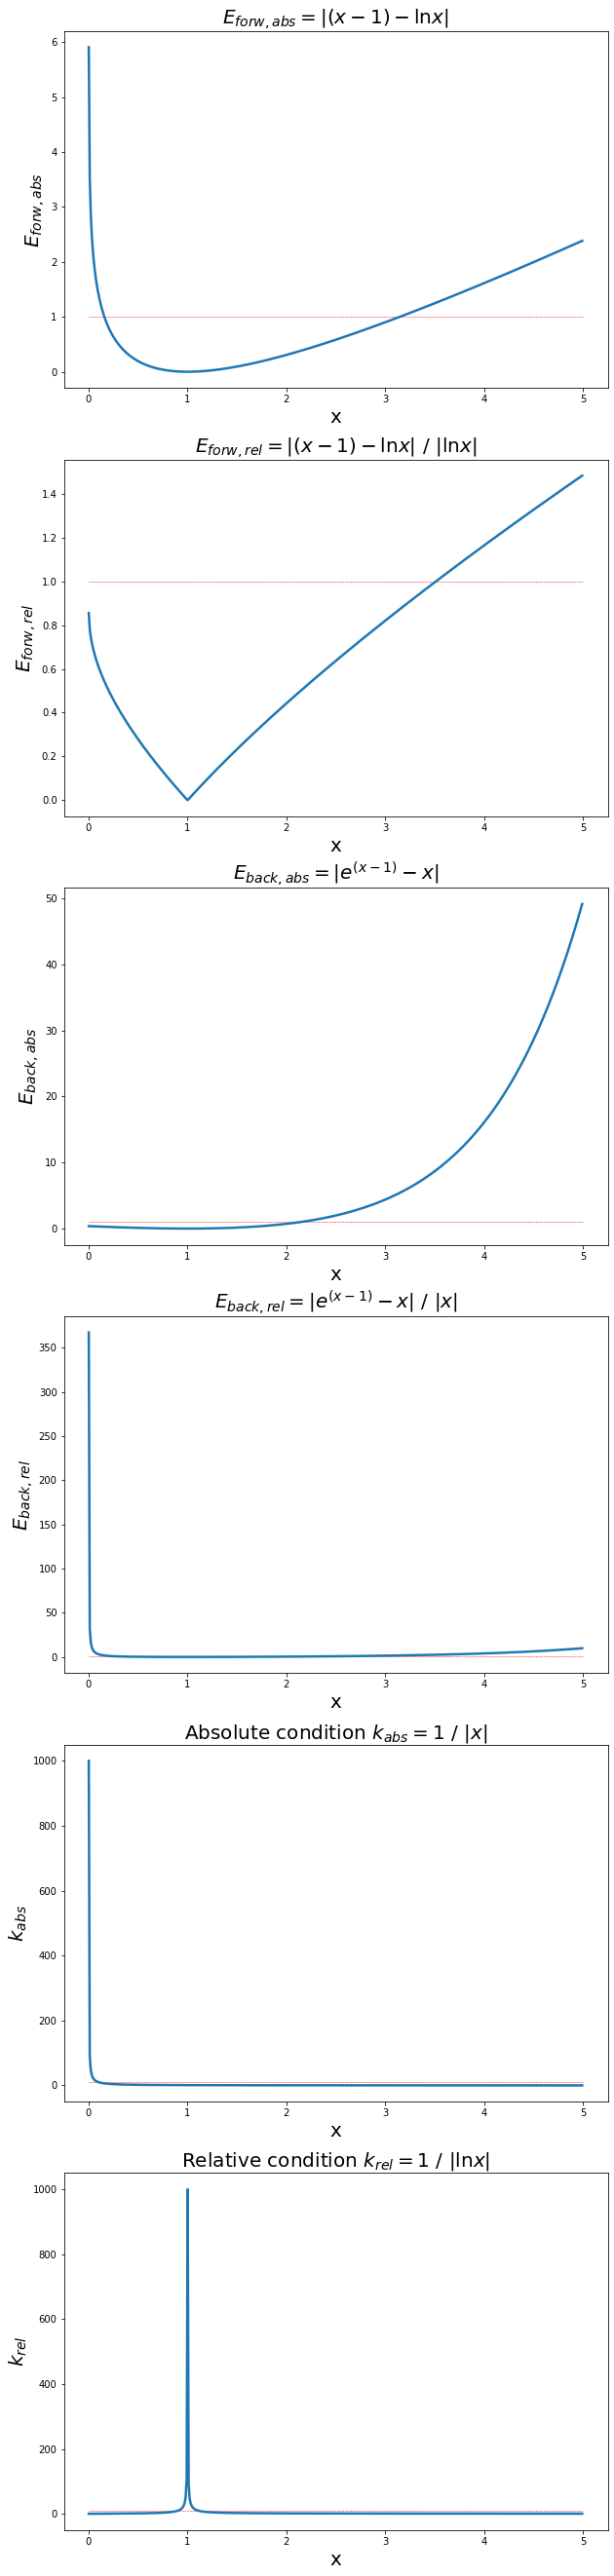

In [2]:
# plots for the compute logarithm ex in Week 2. Numerics and Error Analysis slides

fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)

# Axes labels and plot titles
ax[0].set_xlabel("x", fontsize=20)
ax[0].set_ylabel('$E_{forw,abs}$', fontsize=20)
ax[0].set_title('$E_{forw,abs}=|(x-1)-\ln x|$', fontsize=20)

ax[1].set_xlabel("x", fontsize=20)
ax[1].set_ylabel("$E_{forw,rel}$", fontsize=20)
ax[1].set_title('$E_{forw,rel}=|(x-1)-\ln x|~/~|\ln x|$', fontsize=20)
# ax[1].set_title('$E_{forw,rel}= \frac{|(x-1)-\ln x|}{|\ln x|}$', fontsize=20)

ax[2].set_xlabel("x", fontsize=20)
ax[2].set_ylabel("$E_{back,abs}$", fontsize=20)
ax[2].set_title('$E_{back,abs}=|e^{(x-1)}-x|$', fontsize=20)

ax[3].set_xlabel("x", fontsize=20)
ax[3].set_ylabel("$E_{back,rel}$", fontsize=20)
ax[3].set_title('$E_{back,rel}=|e^{(x-1)}-x|~/~|x|$', fontsize=20)

ax[4].set_xlabel("x", fontsize=20)
ax[4].set_ylabel("$k_{abs}$", fontsize=20)
ax[4].set_title('Absolute condition $k_{abs}=1~/~|x|$', fontsize=20)

ax[5].set_xlabel("x", fontsize=20)
ax[5].set_ylabel("$k_{rel}$", fontsize=20)
ax[5].set_title('Relative condition $k_{rel}=1~/~|\ln x|$', fontsize=20)

# Defining functions
x = np.arange(0.001, 5, 0.01)
y1 = abs(x - 1 - np.log(x))
y2 = abs((x - 1 - np.log(x)) / np.log(x))
y3 = abs(np.exp(x - 1) - x)
y4 = abs((np.exp(x - 1) - x) / x)

# Plotting
ax[0].plot(x, y1, lw=2.5)
ax[1].plot(x, y2, lw=2.5)
ax[2].plot(x, y3, lw=2.5)
ax[3].plot(x, y4, lw=2.5)

ax[4].plot(x, 1 / abs(x), lw=2.5)
ax[5].plot(x, 1 / abs(np.log(x)), lw=2.5)

# Adding horizontal lines
# Threshold lines for errors at level 1
# for detection of stability of approximate computation
for i in range(0,4):
  ax[i].hlines(y=1, xmin=0, xmax=5, linewidth=0.5, ls = "--", color='r')

# Threshold lines for condition numbers at level 10
# for detection of well vs ill conditioning. 
for i in range(4,6):
  ax[i].hlines(y=10, xmin=0, xmax=5, linewidth=0.5, ls = "--", color='r')

The above pix are for logarithm. Below we do the same for sqrt() function. 

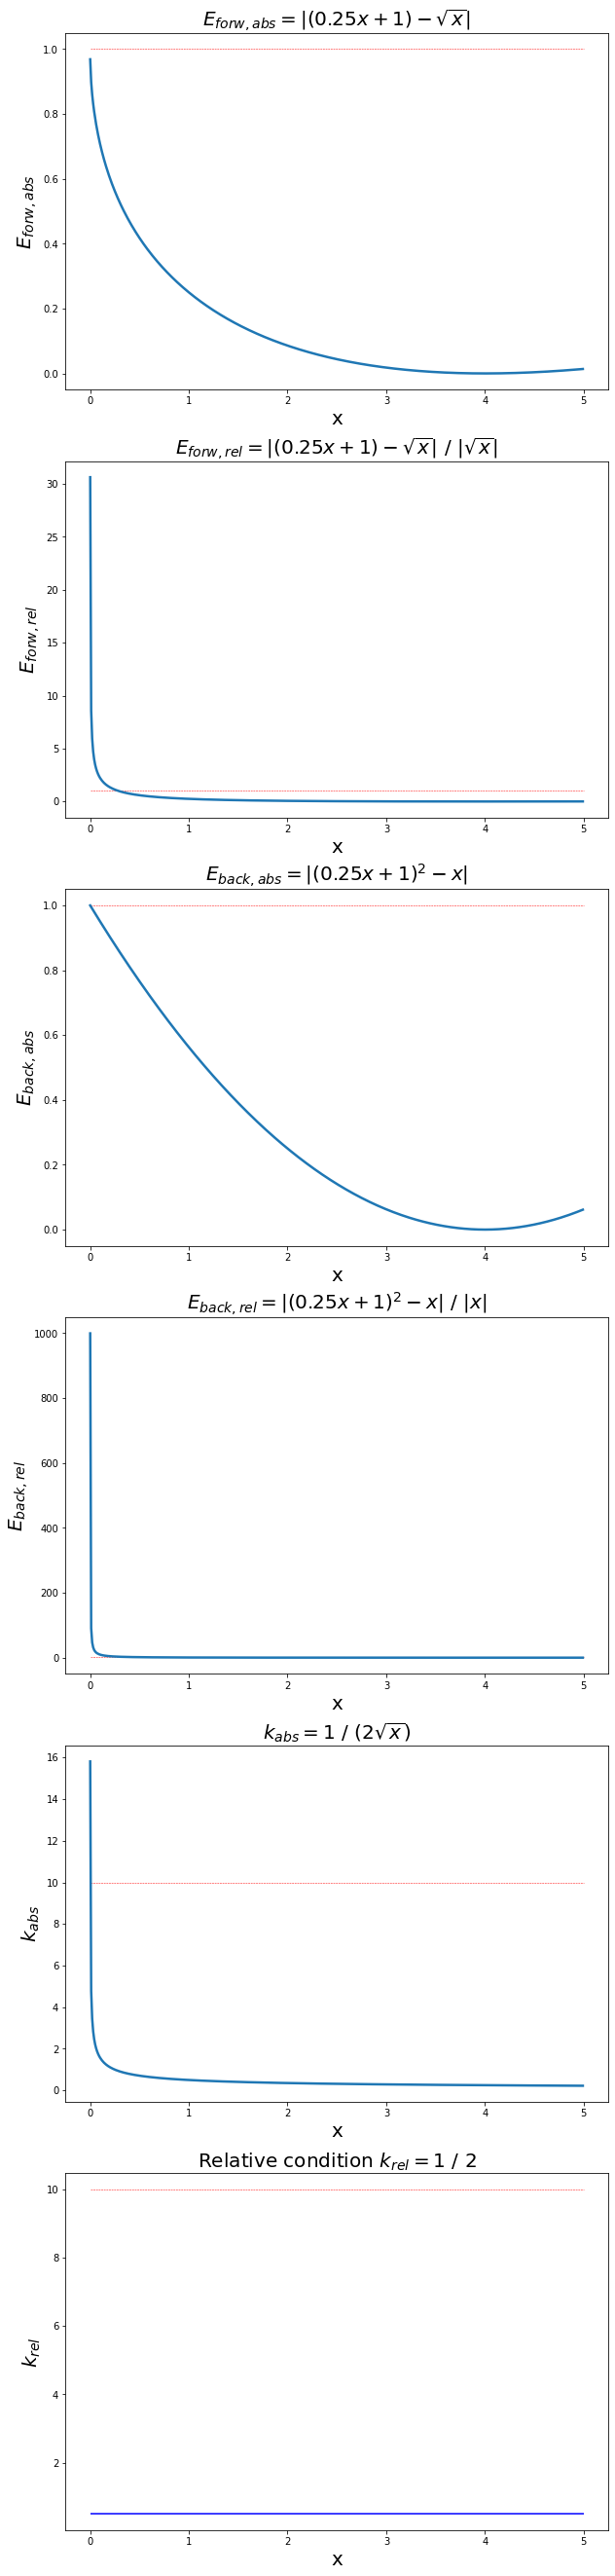

In [3]:
# Plots for quiz practice. ch2
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)

# Axes labels and plot titles
ax[0].set_xlabel("x", fontsize=20)
ax[0].set_ylabel("$E_{forw,abs}$", fontsize=20)
ax[0].set_title('$E_{forw,abs}=|(0.25x+1)-\sqrt{x}|$', fontsize=20)

ax[1].set_xlabel("x", fontsize=20)
ax[1].set_ylabel("$E_{forw,rel}$", fontsize=20)
ax[1].set_title('$E_{forw,rel}=|(0.25x+1)-\sqrt{x}|~/~|\sqrt{x}|$', fontsize=20)

ax[2].set_xlabel("x", fontsize=20)
ax[2].set_ylabel("$E_{back,abs}$", fontsize=20)
ax[2].set_title('$E_{back,abs}=|(0.25x+1)^2-x|$', fontsize=20)

ax[3].set_xlabel("x", fontsize=20)
ax[3].set_ylabel("$E_{back,rel}$", fontsize=20)
ax[3].set_title('$E_{back,rel}=|(0.25x+1)^2-x|~/~|x|$', fontsize=20)

ax[4].set_xlabel("x", fontsize=20)
ax[4].set_ylabel("$k_{abs}$", fontsize=20)
ax[4].set_title('$k_{abs}=1~/~(2 \sqrt{x})$', fontsize=20)

ax[5].set_xlabel("x", fontsize=20)
ax[5].set_ylabel("$k_{rel}$", fontsize=20)
ax[5].set_title('Relative condition $k_{rel}=1~/~2$', fontsize=20)

# Defining functions
x = np.arange(0.001, 5, 0.01)
y1 = abs((0.25 * x + 1) - np.sqrt(x))
y2 = y1 / abs(np.sqrt(x))
y3 = abs((0.25 * x + 1) ** 2 - x)
y4 = y3 / abs(x)

# Plotting
ax[0].plot(x, y1, lw=2.5)
ax[1].plot(x, y2, lw=2.5)
ax[2].plot(x, y3, lw=2.5)
ax[3].plot(x, y4, lw=2.5)

ax[4].plot(x, 1 / (2 * np.sqrt(x)), lw=2.5)
ax[5].hlines(y=0.5, xmin=0, xmax=5, color='b')

# Adding horizontal lines
for i in range(0,4):
  ax[i].hlines(y=1, xmin=0, xmax=5, linewidth=0.5, ls = "--", color='r')

for i in range(4,6):
  ax[i].hlines(y=10, xmin=0, xmax=5, linewidth=0.5, ls = "--", color='r')

Trying to generalize the code

In [4]:
import sympy
from sympy import N

import numpy as np
import matplotlib.pyplot as plt

# INITIAL DATA
# online quiz
x, y = sympy.symbols("x, y", real=True)
F = sympy.Lambda(x, sympy.cbrt(x))  # problem F
Finverse = sympy.Lambda(y, y ** 3)  # inverse of F
Fderiv = sympy.Lambda(x, 1 / (3 * x ** (2/3)))  # derivative of F. need to compute condition numbers
Ftilde = sympy.Lambda(x, x / 3)    # approximate algorithm Ftilde
x0 = 3  # input x0

# data for quiz from slides
# F = sympy.Lambda(x, sympy.sqrt(x))
# Finverse = sympy.Lambda(y, y ** 2)
# Fderiv = sympy.Lambda(x, 1 / (2 * x ** (1/2)))
# Ftilde = sympy.Lambda(x, 0.25 * x + 1)
# x0 = 2


# COMPUTATIONS
y0 = N(F(x0)) # true solution
ytilde = N(Ftilde(x0)) # approximate solution
xtilde = N(Finverse(ytilde)) # preimage of ytilde with respect to F

print("x0 = ", x0, "\ny0 = ", y0, "\nytilde = ", ytilde, "\nxtilde = ", xtilde)

# errors functions
Eaf = abs(ytilde - y0) # absolute forward error
Erf = Eaf / abs(y0) # relative forward error
Eab = abs(xtilde - x0) # absolute backward error
Erb = Eab / abs(x0) # relative backward error
print("\nEaf = ", Eaf, "\nErf = ", Erf, "\nEab = ", Eab, "\nErb = ", Erb)

# condition numbers
Kabs = abs(Fderiv(x0))
Krel = N(abs((x0*Fderiv(x0)) / F(x0)))
print("\nKabs = ", Kabs, "\nKrel = ", Krel)

x0 =  3 
y0 =  1.44224957030741 
ytilde =  1.00000000000000 
xtilde =  1.00000000000000

Eaf =  0.442249570307408 
Erf =  0.306638725649365 
Eab =  2.00000000000000 
Erb =  0.666666666666667

Kabs =  0.160249952256379 
Krel =  0.333333333333333


Advanced. Polynomial roots
Just domain and range plotting. No computations. 

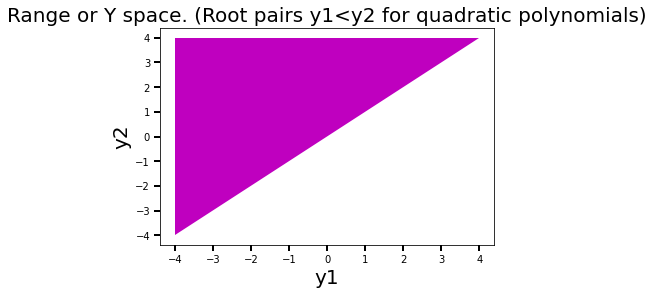

In [5]:
# PLOT UPPER HALF PLAIN
plt.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=10)
plt.xlabel("y1", fontsize=20)
plt.ylabel("y2", fontsize=20)
plt.title('Range or Y space. (Root pairs y1<y2 for quadratic polynomials)', fontsize=20)

plt.fill("j", "k", 'm',
         data={"j": [-4.0, -4.0, 4.0],  # define the triangle vertices
               "k": [-4.0, 4.0, 4.0]})  # here 'm' for magenta colour
plt.show()

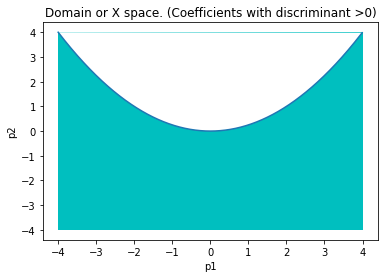

In [6]:
# PLOT FILLED PARABOLA
# Data for plotting parabola
x = np.arange(-4.0, 4.0, 0.01) # domain and step
y = x ** 2 / 4  # determine parabola
plt.plot(x, y)

# Assigning plot attributes
plt.xlabel("p1")
plt.ylabel("p2")
plt.title('Domain or X space. (Coefficients with discriminant >0)')

# Plot rectangle filled with cyan and parabola filled with white
plt.fill("j", "k", 'c',                        # filling rectangle
         data={"j": [-4.0, -4.0, 4.0, 4.0],   # define the rectangle vertices
               "k": [-4.0, 4.0, 4.0, -4.0]})  # here 'c' for cyan colour
plt.fill(x, y, "w")                             # filling parabola
plt.show()                                      # simultaneously plot rectangle and parabola